# CS 4820
# Tutorial 5: Data Pre-processing and Model Analysis

In the labs and assignments that have worked on so far, input data were pretty much all ready for training and testing our ANN models. However, in the real-world situation, that is not necessarily the case thus requiring a data pre-processing phase.

Also, as shown in the *ANN Intuition Part II* slides, other than accurary, we want to use additional measurements such as ${f_1}$ score and confusion matrix to analyze the performance of our model. 

### 0. The *bank_customers* Dataset and Data Preprocessing

> Libraries used: pandas, sklearn


The *bank_customers* dataset contains information of 10,000 customers at a Bank. We want to build our ANN model to predict if a customer will leave the bank.

For such a dataset, the data pro-processing phase primarily involves the following steps:

- Some features such as row number, customer id and customer surname are irrelevant to our task therefore need to be removed from the dataset. 
- Some features such as geography and geneder need to be encoded into numerical values.
- All features need to be scaled/standardized. 

> [Why, How and When to Scale your Features](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e)


It describes three species of 150 flowers, with four features each, so it’s a great example of a Multiclass classification. Let’s see how Multiclass classification’s done using Keras and the Iris dataset. First of all, let’s load the data.

In [9]:
#import matplotlib.pyplot as plt
import pandas as pd

# allow multiple outputs be displayed for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
# Importing the dataset
df = pd.read_csv('./data/bank_customers.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### 0.1 First, let's remove the irrelevant information and seprate the input data from the targets.

In [108]:
#df.iloc[:, 3:13].head(5)
#df.iloc[:, 13].head(5)

X = df.iloc[:, 3:13].values
X[:5,:]
y = df.iloc[:, 13].values
y[:5]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

array([1, 0, 1, 0, 0])

#### 0.2 Second, encode the categorical input darta

In [109]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# country
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
X[:15,:]

array([[619, 0, 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 2, 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 0, 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 1, 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 0, 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 0, 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73],
       [528, 0, 'Male', 31, 6, 102016.72, 2, 0, 0, 80181.12],
       [497, 2, 'Male', 24, 3, 0.0, 2, 1, 0, 76390.01],
       [476, 0, 'Female', 34, 10, 0.0, 2, 1, 0, 26260.98],
       [549, 0, 'Female', 25, 5, 0.0, 2, 0, 0, 190857.79],
       [635, 2, 'Female', 35, 7, 0.0, 2, 1, 1, 65951.65]], dtype=object)

In [110]:
# gender
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
X[:15,:]

array([[619, 0, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 2, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 0, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 1, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 0, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 0, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73],
       [528, 0, 1, 31, 6, 102016.72, 2, 0, 0, 80181.12],
       [497, 2, 1, 24, 3, 0.0, 2, 1, 0, 76390.01],
       [476, 0, 0, 34, 10, 0.0, 2, 1, 0, 26260.98],
       [549, 0, 0, 25, 5, 0.0, 2, 0, 0, 190857.79],
       [635, 2, 0, 35, 7, 0.0, 2, 1, 1, 65951.65]], dtype=object)

In [111]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X[:10,:]
X = X[:, 1:]
X[:10,:]

/anaconda3/envs/CS4820/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/envs/CS4820/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1900000e+02,
        0.0000000e+00, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 6.0800000e+02,
        0.0000000e+00, 4.1000000e+01, 1.0000000e+00, 8.3807860e+04,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.0200000e+02,
        0.0000000e+00, 4.2000000e+01, 8.0000000e+00, 1.5966080e+05,
        3.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.1393157e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.9900000e+02,
        0.0000000e+00, 3.9000000e+01, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.3826630e+04],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 8.5000000e+02,
        0.0000000e+00, 4.3000000e+01, 2.0000000e+00, 1.2551082e+05,
        1.0000000e+00, 1.0000000e+00, 1.0000

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, 0.0000000e+00,
        4.2000000e+01, 2.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, 0.0000000e+00,
        4.1000000e+01, 1.0000000e+00, 8.3807860e+04, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, 0.0000000e+00,
        4.2000000e+01, 8.0000000e+00, 1.5966080e+05, 3.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.1393157e+05],
       [0.0000000e+00, 0.0000000e+00, 6.9900000e+02, 0.0000000e+00,
        3.9000000e+01, 1.0000000e+00, 0.0000000e+00, 2.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.3826630e+04],
       [0.0000000e+00, 1.0000000e+00, 8.5000000e+02, 0.0000000e+00,
        4.3000000e+01, 2.0000000e+00, 1.2551082e+05, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 7.9084100e+04],
       [0.0000000e+00, 1.0000000e+00, 6.4500000e+0

#### 0.3 Feature Scaling
The standard score of a sample $x$ is calculated as:

$$ z = (x - u) / s $$
where $u$ is the mean of the training samples or zero if `with_mean=False`, and $s$ is the standard deviation of the training samples or one if `with_std=False`

In [112]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X[:5,:]

array([[-0.57873591, -0.57380915, -0.32622142, -1.09598752,  0.29351742,
        -1.04175968, -1.22584767, -0.91158349,  0.64609167,  0.97024255,
         0.02188649],
       [-0.57873591,  1.74273971, -0.44003595, -1.09598752,  0.19816383,
        -1.38753759,  0.11735002, -0.91158349, -1.54776799,  0.97024255,
         0.21653375],
       [-0.57873591, -0.57380915, -1.53679418, -1.09598752,  0.29351742,
         1.03290776,  1.33305335,  2.52705662,  0.64609167, -1.03067011,
         0.2406869 ],
       [-0.57873591, -0.57380915,  0.50152063, -1.09598752,  0.00745665,
        -1.38753759, -1.22584767,  0.80773656, -1.54776799, -1.03067011,
        -0.10891792],
       [-0.57873591,  1.74273971,  2.06388377, -1.09598752,  0.38887101,
        -1.04175968,  0.7857279 , -0.91158349,  0.64609167,  0.97024255,
        -0.36527578]])

#### 0.4 Splitting the dataset into the Training set and Test set

Finally, we create a train and test split, with 20% test size. Notice that we introduce 2 more parameters:

- `random_state = 0` sets the seed of the random number generator in a way that we all get the same results.
- `stratify = y` to make sure that we preserve the ratio of labels in each set, i.e. we want each set to be composed of one third of each flower type.

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)
X_train.shape
y_train.shape

(8000, 11)

(8000,)

### 1. Binary-Classification Model

> Libraries used: numpy, keras

Now let's create an ANN model with:

* 11 features in input (Geography - onehotencoded, Credit Score, Gender, Age, Tenure, Balance, NumOfProducts, HadCrCard, IsActiveMemeber, EstimatedSalary)
* 2 hidden layers; 6 neurons per layer; ReLU activation
* 1 neuron in output; sigmoid activation

In [114]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [115]:
model.fit(X_train, y_train, validation_split=0.1, batch_size = 10, epochs = 50, verbose=2)

Train on 7200 samples, validate on 800 samples
Epoch 1/50
7200/7200 - 1s - loss: 0.4600 - accuracy: 0.7964 - val_loss: 0.4030 - val_accuracy: 0.8250
Epoch 2/50
7200/7200 - 1s - loss: 0.4198 - accuracy: 0.8222 - val_loss: 0.3998 - val_accuracy: 0.8313
Epoch 3/50
7200/7200 - 1s - loss: 0.4113 - accuracy: 0.8285 - val_loss: 0.3957 - val_accuracy: 0.8313
Epoch 4/50
7200/7200 - 1s - loss: 0.4049 - accuracy: 0.8349 - val_loss: 0.3863 - val_accuracy: 0.8300
Epoch 5/50
7200/7200 - 1s - loss: 0.3980 - accuracy: 0.8351 - val_loss: 0.3844 - val_accuracy: 0.8425
Epoch 6/50
7200/7200 - 1s - loss: 0.3917 - accuracy: 0.8386 - val_loss: 0.3792 - val_accuracy: 0.8438
Epoch 7/50
7200/7200 - 1s - loss: 0.3825 - accuracy: 0.8425 - val_loss: 0.3646 - val_accuracy: 0.8512
Epoch 8/50
7200/7200 - 1s - loss: 0.3628 - accuracy: 0.8517 - val_loss: 0.3483 - val_accuracy: 0.8550
Epoch 9/50
7200/7200 - 1s - loss: 0.3481 - accuracy: 0.8579 - val_loss: 0.3399 - val_accuracy: 0.8587
Epoch 10/50
7200/7200 - 1s - loss: 

In [116]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

### 2. Analysis

> Libraries used: numpy, sklearn, matplotlib, seaborn

According to our ANN model, which customers will leave? Which customers will stay? 

To create a classification report, we'll run the `classification_report()` method, passing it the test class (the list that we created before of the _correct_ labels for each dataum) and the `y_pred_class` (the list we just obtained of the predicted classes).

In [117]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.76      0.43      0.54       407

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000



We get the confusion matrix by running the `confusion_matrix()` method passing it the same arguments as the classification report:

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm)

,0,1
0,1537,56
1,234,173


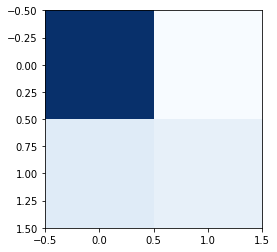

In [119]:
import matplotlib.pyplot as plt

plt.imshow(cm, cmap='Blues');

Looks like our model did a reasonably good job when predicting which customers will stay (`y_pred=0`) but needed more imporvements when predicting which customers will stay (`y_pred=1`).

In [120]:
print('Test accuracy for our ANN model:', \
      round(accuracy_score(y_test, y_pred)*100, 2),'%')

Test accuracy for our ANN model: 85.5 %
